In [90]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [91]:
#đọc dl từ file csv
data = pd.read_csv('Shill Bidding Dataset.csv')

#liệt kê danh sách các cột
print(list(data.columns))

['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class']


In [92]:
data.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [93]:
#hiển thị số lượng 0 là đấu thầu bình thường, 1 là không
#kết quả: 675 rớt, 5646 là thầu bình thường
data['Class'].value_counts()

0    5646
1     675
Name: Class, dtype: int64

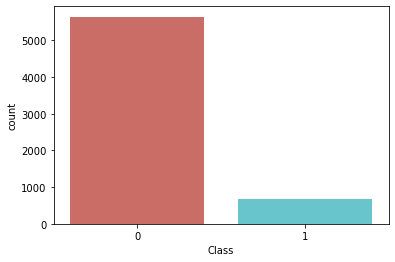

In [94]:
#Biểu đồ cột sử dụng thư viện seaborn để hiển thị, cho ta thấy sự chênh lệch sự chênh lệch số lượng lớn giữa bên thầu và bên không
sns.countplot(x='Class', data=data, palette='hls')
plt.show()

In [95]:
data.groupby('Class').mean()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
Class,,,,,,,,,,,
0,7541.459440,1243.419412,0.122403,0.101775,0.016649,0.450286,0.227638,0.465605,0.423630,0.308242,4.597060
1,7488.737778,1224.398519,0.310979,0.344268,0.832593,0.570463,0.264797,0.533181,0.489674,0.865322,4.765926


##### Record_ID seems to be a good feature #####


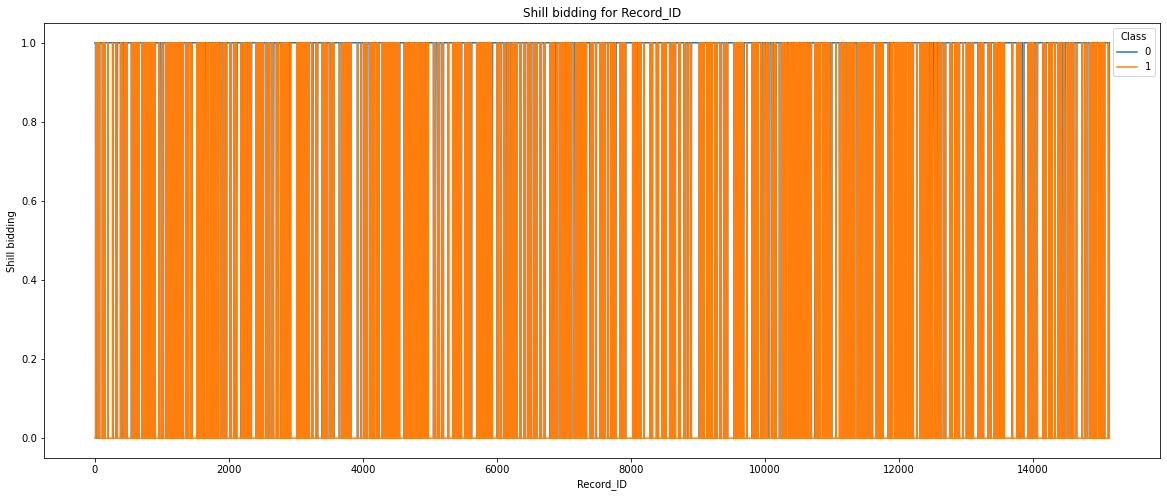

In [96]:
pd.crosstab(data['Record_ID'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Record_ID')
plt.xlabel('Record_ID')
plt.ylabel('Shill bidding')
print("##### Record_ID seems to be a good feature #####")

##### Auction_ID seems to be a good feature #####


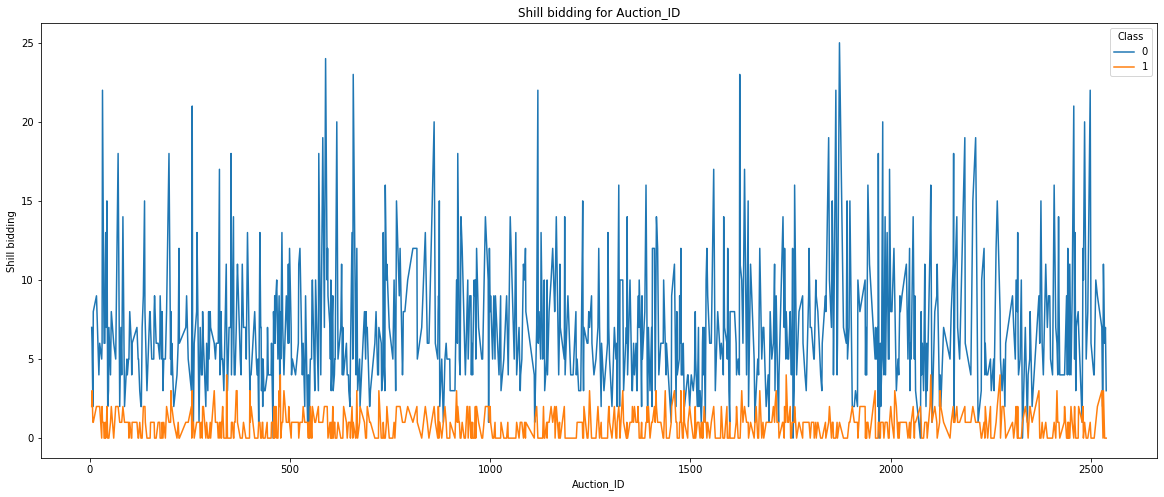

In [97]:
pd.crosstab(data['Auction_ID'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Auction_ID')
plt.xlabel('Auction_ID')
plt.ylabel('Shill bidding')
print("##### Auction_ID seems to be a good feature #####")

##### Bidder_ID seems to be a good feature #####


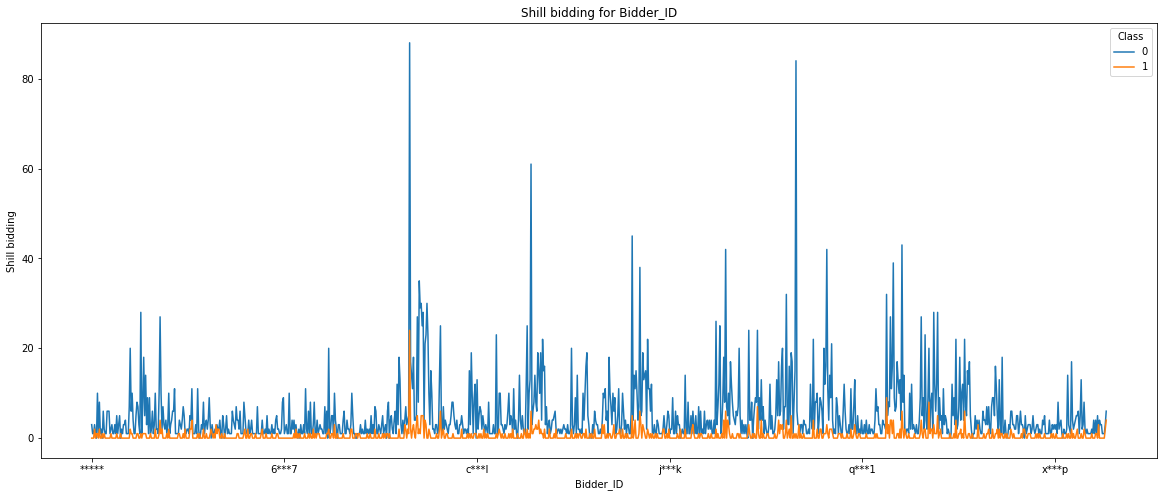

In [98]:
pd.crosstab(data['Bidder_ID'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Bidder_ID')
plt.xlabel('Bidder_ID')
plt.ylabel('Shill bidding')
print("##### Bidder_ID seems to be a good feature #####")

##### Bidder_Tendency seems to be a good feature #####


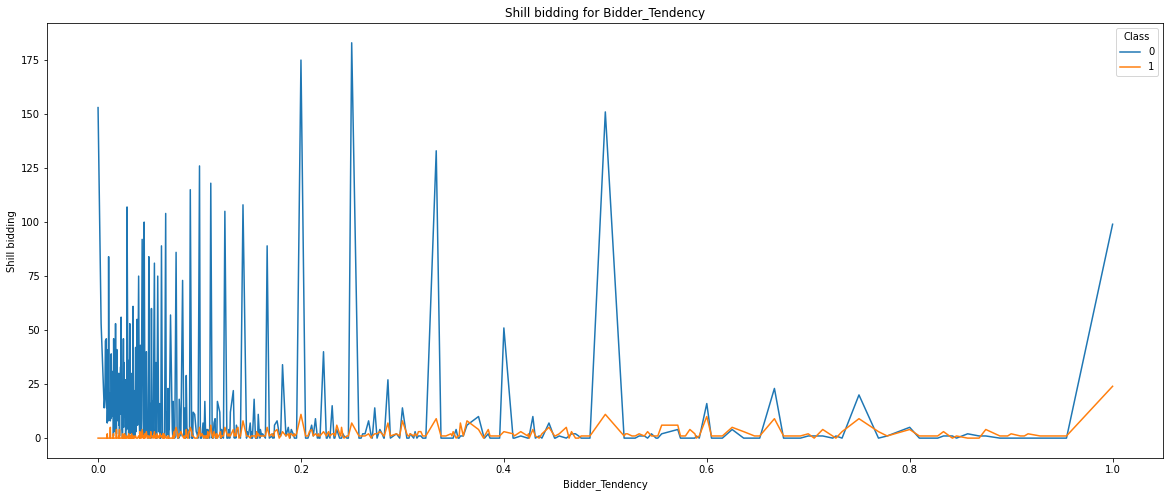

In [99]:
pd.crosstab(data['Bidder_Tendency'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Bidder_Tendency')
plt.xlabel('Bidder_Tendency')
plt.ylabel('Shill bidding')
print("##### Bidder_Tendency seems to be a good feature #####")

##### Bidding_Ratio seems to be a good feature #####


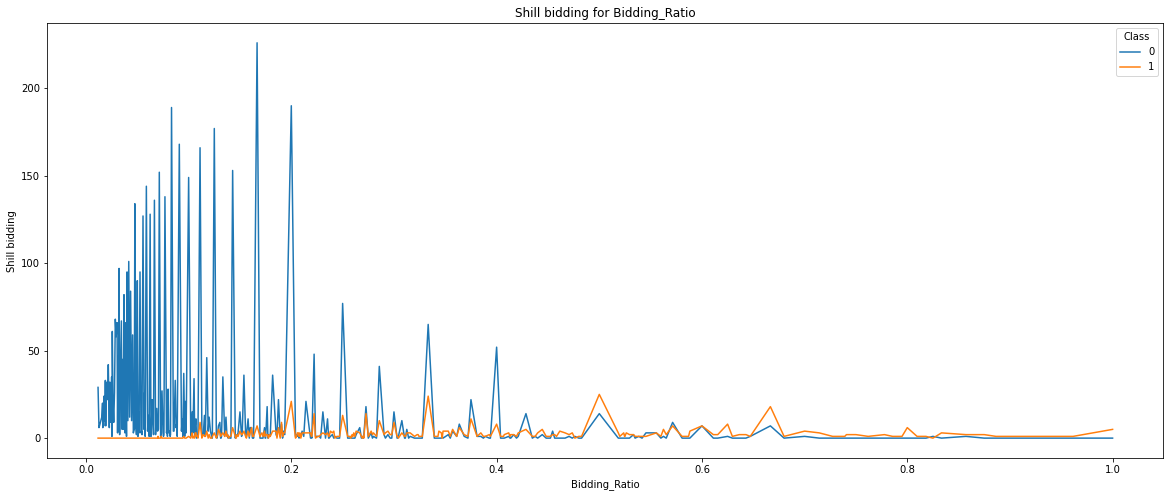

In [100]:
pd.crosstab(data['Bidding_Ratio'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Bidding_Ratio')
plt.xlabel('Bidding_Ratio')
plt.ylabel('Shill bidding')
print("##### Bidding_Ratio seems to be a good feature #####")

##### Successive_Outbidding seems to be a good feature #####


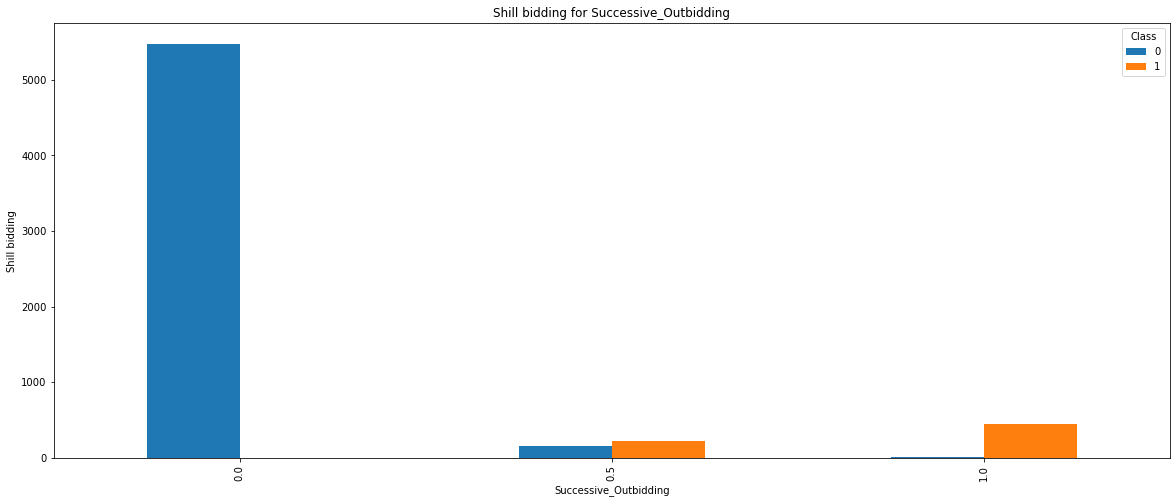

In [101]:
pd.crosstab(data['Successive_Outbidding'], data['Class']).plot(kind='bar', figsize=(20, 8))
plt.title('Shill bidding for Successive_Outbidding')
plt.xlabel('Successive_Outbidding')
plt.ylabel('Shill bidding')
print("##### Successive_Outbidding seems to be a good feature #####")

##### Last_Bidding seems to be a good feature #####


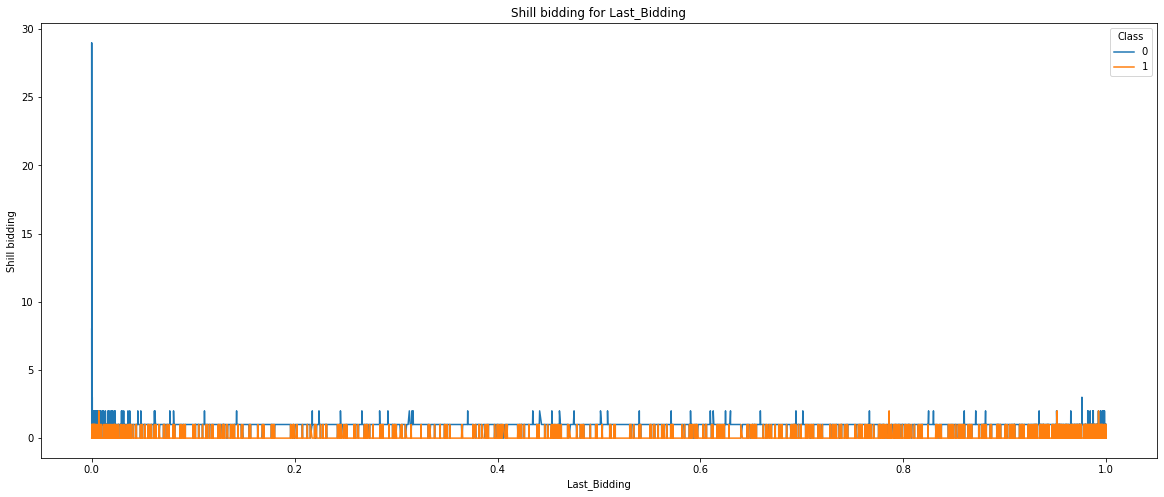

In [102]:
pd.crosstab(data['Last_Bidding'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Last_Bidding')
plt.xlabel('Last_Bidding')
plt.ylabel('Shill bidding')
print("##### Last_Bidding seems to be a good feature #####")

##### Auction_Bids seems to be a good feature #####


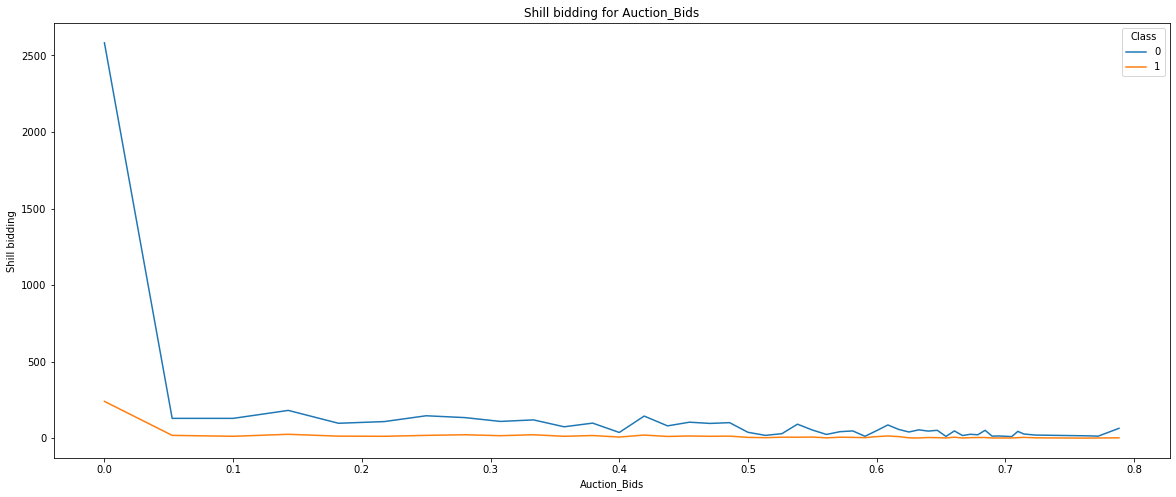

In [103]:
pd.crosstab(data['Auction_Bids'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Auction_Bids')
plt.xlabel('Auction_Bids')
plt.ylabel('Shill bidding')
print("##### Auction_Bids seems to be a good feature #####")

##### Starting_Price_Average seems to be a good feature #####


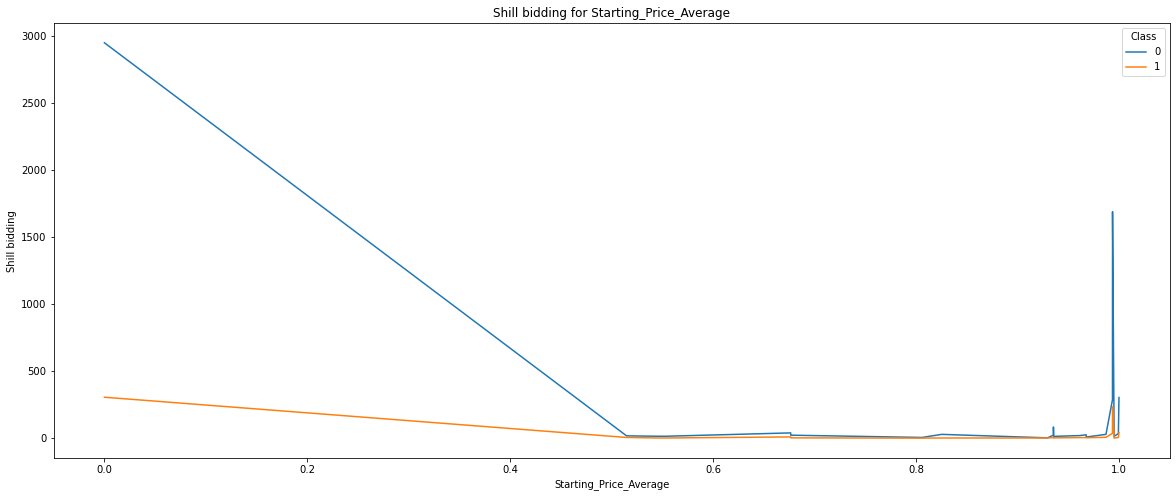

In [104]:
pd.crosstab(data['Starting_Price_Average'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Starting_Price_Average')
plt.xlabel('Starting_Price_Average')
plt.ylabel('Shill bidding')
print("##### Starting_Price_Average seems to be a good feature #####")

##### Early_Bidding seems to be a good feature #####


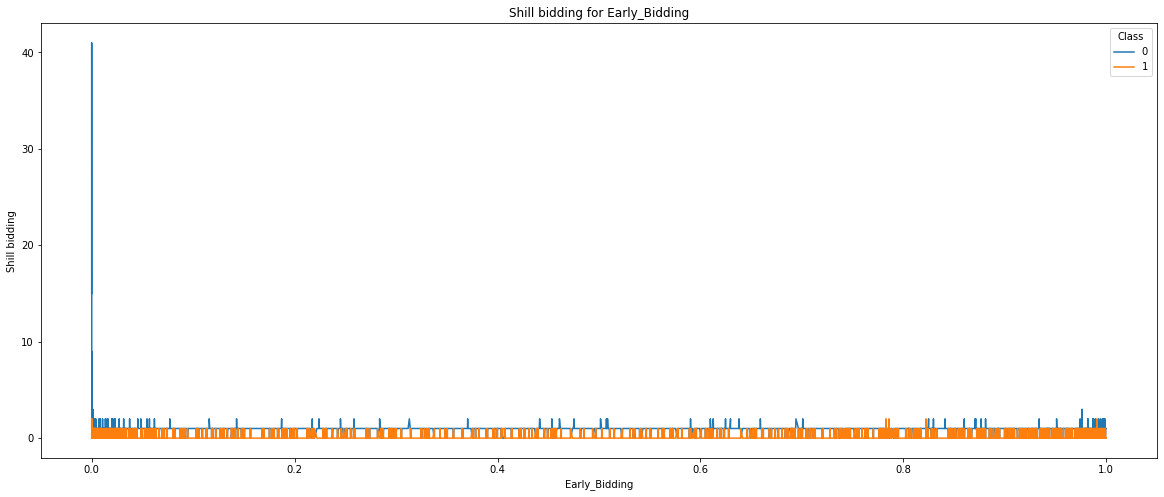

In [105]:
pd.crosstab(data['Early_Bidding'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Early_Bidding')
plt.xlabel('Early_Bidding')
plt.ylabel('Shill bidding')
print("##### Early_Bidding seems to be a good feature #####")

##### Winning_Ratio seems to be a good feature #####


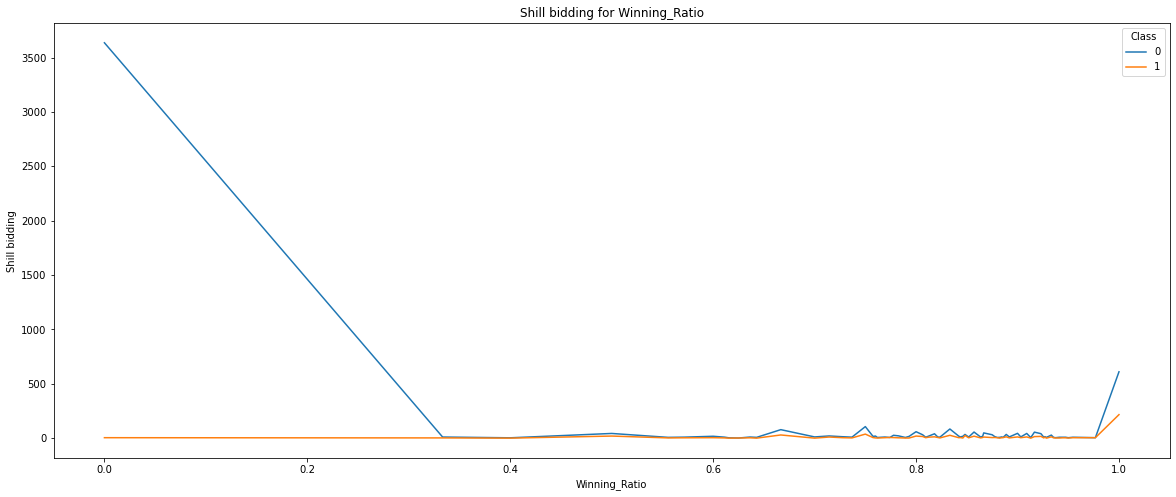

In [106]:
pd.crosstab(data['Winning_Ratio'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Winning_Ratio')
plt.xlabel('Winning_Ratio')
plt.ylabel('Shill bidding')
print("##### Winning_Ratio seems to be a good feature #####")

##### Auction_Duration seems to be a good feature #####


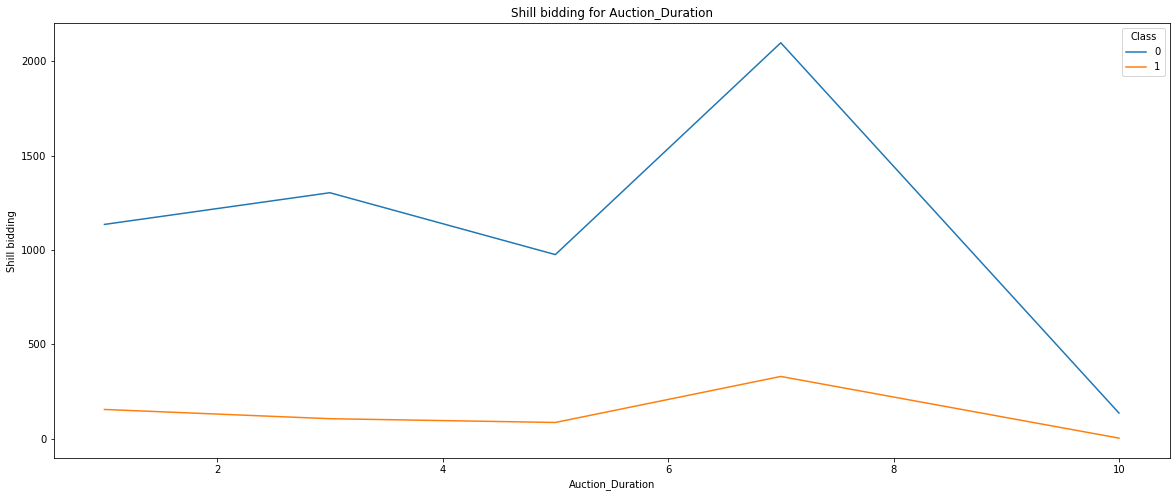

In [107]:
pd.crosstab(data['Auction_Duration'], data['Class']).plot(kind='line', figsize=(20, 8))
plt.title('Shill bidding for Auction_Duration')
plt.xlabel('Auction_Duration')
plt.ylabel('Shill bidding')
print("##### Auction_Duration seems to be a good feature #####")

In [108]:
cat_features = [
    'Bidder_ID', 
]

for feature in cat_features:
    print(feature)
    job_list = pd.get_dummies(data[feature], prefix = feature)
    new_data = data.join(job_list)
    data = new_data

data.head()

Bidder_ID


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,...,Bidder_ID_z***i,Bidder_ID_z***l,Bidder_ID_z***m,Bidder_ID_z***n,Bidder_ID_z***o,Bidder_ID_z***r,Bidder_ID_z***s,Bidder_ID_z***v,Bidder_ID_z***y,Bidder_ID_z***z
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,...,0,0,0,0,0,0,0,0,0,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,...,0,0,0,0,0,0,0,0,0,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,...,0,0,0,0,0,0,0,0,0,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,...,0,0,0,0,0,0,0,0,0,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,...,0,0,0,0,0,0,0,0,0,1


In [109]:
data_features = data.columns.values.tolist()
print(data_features)
remove_features = [
    'Record_ID', 
    'Bidder_ID', 
]

to_keep_features = [i for i in data_features if i not in remove_features]
print(to_keep_features)

['Record_ID', 'Auction_ID', 'Bidder_ID', 'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Class', 'Bidder_ID_*****', 'Bidder_ID_****h', 'Bidder_ID_****y', 'Bidder_ID_-***-', 'Bidder_ID_-***9', 'Bidder_ID_-***_', 'Bidder_ID_-***a', 'Bidder_ID_-***d', 'Bidder_ID_-***e', 'Bidder_ID_-***g', 'Bidder_ID_-***h', 'Bidder_ID_-***i', 'Bidder_ID_-***k', 'Bidder_ID_-***l', 'Bidder_ID_-***m', 'Bidder_ID_-***n', 'Bidder_ID_-***o', 'Bidder_ID_-***r', 'Bidder_ID_-***s', 'Bidder_ID_-***t', 'Bidder_ID_-***u', 'Bidder_ID_-***v', 'Bidder_ID_-***w', 'Bidder_ID_-***x', 'Bidder_ID_-***y', 'Bidder_ID_-***z', 'Bidder_ID_.***.', 'Bidder_ID_.***0', 'Bidder_ID_.***9', 'Bidder_ID_.***a', 'Bidder_ID_.***b', 'Bidder_ID_.***e', 'Bidder_ID_.***g', 'Bidder_ID_.***n', 'Bidder_ID_.***o', 'Bidder_ID_.***r', 'Bidder_ID_.***s', 'Bidder_ID_.***t', 'Bidder_ID_0****', 'Bidder_ID_0***-', 'Bidder_ID_0***0'

In [110]:
data_final = data[to_keep_features]
data_final.head()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,...,Bidder_ID_z***i,Bidder_ID_z***l,Bidder_ID_z***m,Bidder_ID_z***n,Bidder_ID_z***o,Bidder_ID_z***r,Bidder_ID_z***s,Bidder_ID_z***v,Bidder_ID_z***y,Bidder_ID_z***z
0,1,732,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,...,0,0,0,0,0,0,0,0,0,0
1,2,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,...,0,0,0,0,0,0,0,0,0,0
2,3,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,...,0,0,0,0,0,0,0,0,0,0
3,4,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,...,0,0,0,0,0,0,0,0,0,0
4,5,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,...,0,0,0,0,0,0,0,0,0,1


In [111]:
features = np.array(data_final.loc[:, data_final.columns != 'Class'])
print(features)

[[1.00000000e+00 7.32000000e+02 2.00000000e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 7.32000000e+02 2.43902440e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 7.32000000e+02 1.42857143e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.51380000e+04 2.48100000e+03 5.55555560e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.51390000e+04 2.48100000e+03 7.69230770e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.51440000e+04 2.48100000e+03 1.63934430e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [112]:
targets = np.array(data_final.loc[:, data_final.columns == 'Class'])
print(targets)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [113]:
train_features, test_features, train_targets, test_targets = train_test_split(
    features, targets, test_size = 0.3, random_state=0
)
print("##### Training and test datasets #####")
print("Training size: ", len(train_targets))
print("Test size: ", len(test_targets))
print(test_targets)

##### Training and test datasets #####
Training size:  4424
Test size:  1897
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [114]:
classifier_logreg = LogisticRegression()
classifier_logreg.fit(train_features, train_targets)

c:\Users\hotro\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hotro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
predictions = classifier_logreg.predict(test_features)
print("##### Prediction results of Logistic Regression #####")
print("Target labels: ", test_targets.T)
print("Prediction labels:  ", predictions)

##### Prediction results of Logistic Regression #####
Target labels:  [[0 0 0 ... 0 1 0]]
Prediction labels:   [0 0 0 ... 1 1 0]


In [116]:
accuracy = 100 * accuracy_score(test_targets, predictions)
print("##### Prediction accuracy of Logistic Regression #####")
print("Accuracy: ", accuracy)
print(classification_report(test_targets, predictions))

##### Prediction accuracy of Logistic Regression #####
Accuracy:  96.88982604111756
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1702
           1       0.82      0.89      0.86       195

    accuracy                           0.97      1897
   macro avg       0.90      0.93      0.92      1897
weighted avg       0.97      0.97      0.97      1897



In [117]:
predictions = classifier_logreg.predict(train_features)
print("##### Training - Prediction results of Logistic Regression #####")
print("Target labels: ", train_targets.T)
print("Prediction labels:  ", predictions)

##### Training - Prediction results of Logistic Regression #####
Target labels:  [[0 1 0 ... 0 0 0]]
Prediction labels:   [0 1 0 ... 0 0 0]


In [118]:
accuracy = 100 * accuracy_score(train_targets, predictions)
print("##### Prediction accuracy of Logistic Regression #####")
print("Accuracy: ", accuracy)
print(classification_report(train_targets, predictions))

##### Prediction accuracy of Logistic Regression #####
Accuracy:  97.51356238698011
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3944
           1       0.88      0.89      0.89       480

    accuracy                           0.98      4424
   macro avg       0.93      0.94      0.94      4424
weighted avg       0.98      0.98      0.98      4424

